In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def pca(X):
    """
    X: Matrix such that rows correspond to data
       points and columns correspond to the
       features.
    Returns principal values, principal
    components
    """
    assert len(X.shape) == 2
    # We use X.T as each column is a variable
    covariance_matrix = torch.cov(X.T)
    l, e = torch.linalg.eig(covariance_matrix)
    return l, e


def draw_line(direction_vector,
              min_x=0, max_x=10,
              color='magenta'):
    """
    Draw a line along the direction vector
    from (min_x to max_x)
    """
    # fill up the array such that the
    # the 0th column (line[:, 0]) contains x values
    # and the 1th column (line[:, 1]) contains y
    # values.
    line = np.array([direction_vector * v for v in
                     np.linspace(min_x, max_x, 100)])
    plt.plot(line[:, 0], line[:, 1], color=color)

In [7]:
# Let us now try a similar experiment with
# uncorrelated data
N = 100
torch.manual_seed(42)
x_0 = torch.normal(0, 100, (N,))
x_1 = torch.normal(0, 100, (N,))
X = torch.column_stack((x_0, x_1))

X

tensor([[ 1.9269e+02,  7.2618e+01],
        [ 1.4873e+02,  9.1152e+00],
        [ 9.0072e+01, -3.8907e+01],
        [-2.1055e+02,  5.2792e+01],
        [ 6.7842e+01,  1.0311e+02],
        [-1.2345e+02, -7.0477e+01],
        [-4.3067e+00,  1.0131e+02],
        [-1.6047e+02, -3.3082e+01],
        [-7.5214e+01,  1.0950e+02],
        [ 1.6487e+02,  3.3989e+01],
        [-3.9248e+01,  7.1997e+01],
        [-1.4036e+02,  4.1141e+01],
        [-7.2788e+01, -5.7332e+01],
        [-5.5943e+01,  5.0686e+01],
        [-7.6884e+01, -4.7521e+01],
        [ 7.6245e+01, -4.9203e+01],
        [ 1.6423e+02, -1.3603e+01],
        [-1.5960e+01,  1.6354e+02],
        [-4.9740e+01,  6.5474e+01],
        [ 4.3959e+01,  5.7600e+01],
        [-7.5813e+01, -3.6091e+01],
        [ 1.0783e+02, -6.0590e+00],
        [ 8.0080e+01,  7.3255e+00],
        [ 1.6806e+02,  8.1865e+01],
        [ 1.2791e+02, -3.7534e+01],
        [ 1.2964e+02,  1.0331e+02],
        [ 6.1047e+01, -6.8665e+01],
        [ 1.3347e+02,  6.368

In [13]:
pca(X)

(tensor([9736.4033+0.j, 7876.6592+0.j]),
 tensor([[ 0.9981+0.j, -0.0619+0.j],
         [ 0.0619+0.j,  0.9981+0.j]]))

In [8]:
# Perform PCA
# Note that principal values are close to
# each other - the spread is comparable in both
# directions.
principal_values, principal_components = pca(X)
principal_values = principal_values.real
principal_components = principal_components.real
print("Principal values are {}".format(principal_values))

Principal values are tensor([9736.4033, 7876.6592])


In [9]:
# Find the index with highest principal value
major_index = torch.argmax(principal_values)
minor_index = torch.argmin(principal_values)

print(major_index, minor_index)

tensor(0) tensor(1)


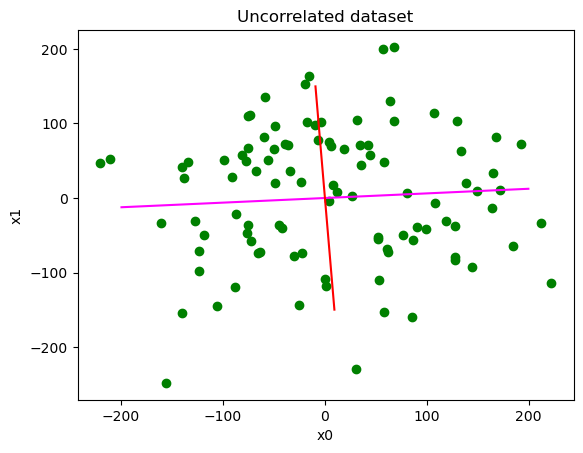

In [14]:
# Plot
plt.figure()
plt.scatter(X[:, 0], X[: , 1],
            color="green")
plt.title('Uncorrelated dataset')
plt.xlabel('x0')
plt.ylabel('x1')

# Let us plot the principal components
draw_line(principal_components[:, major_index].numpy(),
          min_x=-200, max_x=200)

draw_line(principal_components[:, minor_index].numpy(),
          min_x=-150, max_x=150, color="red")

In [15]:
first_principal_vec = principal_components[:, major_index]
first_principal_vec = first_principal_vec.reshape((-1, 1))

X_proj = torch.matmul(X, first_principal_vec)

X_proj

tensor([[ 196.8174],
        [ 149.0074],
        [  87.4904],
        [-206.8801],
        [  74.0948],
        [-127.5807],
        [   1.9736],
        [-162.2069],
        [ -68.2904],
        [ 166.6602],
        [ -34.7155],
        [-137.5446],
        [ -76.1977],
        [ -52.6979],
        [ -79.6783],
        [  73.0523],
        [ 163.0745],
        [  -5.8049],
        [ -45.5911],
        [  47.4405],
        [ -77.9020],
        [ 107.2498],
        [  80.3800],
        [ 172.8077],
        [ 125.3435],
        [ 135.7891],
        [  56.6787],
        [ 137.1601],
        [ -21.7712],
        [   3.8791],
        [ -33.9837],
        [  82.3138],
        [-136.5335],
        [ -88.2589],
        [ -26.8303],
        [ 172.0524],
        [  38.2738],
        [ -44.8451],
        [  16.3162],
        [ -74.2304],
        [-170.8121],
        [  96.7878],
        [ -95.2105],
        [ -54.9700],
        [-129.0668],
        [ 209.8274],
        [-129.3003],
        [ -47

In [16]:
X_back_proj = torch.matmul(X_proj, torch.linalg.pinv(first_principal_vec))
info_loss = torch.sqrt(torch.mean((X_back_proj - X)**2))
print("Loss in Information due to\ndimensionality"
      " reduction: {}\n(high - we're "
      "losing real info)".format(info_loss))

Loss in Information due to
dimensionality reduction: 62.484107971191406
(high - we're losing real info)


# new samples

In [17]:
torch.manual_seed(42)
N = 100
# We create a random feature vector
x_0 = torch.normal(0, 100, (N,))

# Then we create another feature vector which is
# highly correlated with the previous feature:
# x1 = 2 * x0.
# We add random noise to this second feature.
x_1 = 2 * x_0 + torch.normal(0, 20, (N,))

# Create the data matrix with x0, x1 as columns
X = torch.column_stack((x_0, x_1))

# Perform PCA
# One principal value will be >> than the other
# indicating data points are spread more or less
# along a straight line. That straight line will
# be the principal axis, given by the eigenvector
# corresponding to the large eigenvalue.
# The principal axis should match y = 2x.
principal_values, principal_components = pca(X)

principal_values = principal_values.real
principal_components = principal_components.real

print("Principal values are: {}\n"
      "One principal value will be much larger\n"
      "than the other - indicating data points are\n"
      "spread more or less along a straight line\n"
      "That straight line is the principal axis\n"
      "It should be along y = 2x showing the\n"
      " correlation in the data".format(principal_values))

Principal values are: tensor([   62.6133, 48991.0469])
One principal value will be much larger
than the other - indicating data points are
spread more or less along a straight line
That straight line is the principal axis
It should be along y = 2x showing the
 correlation in the data


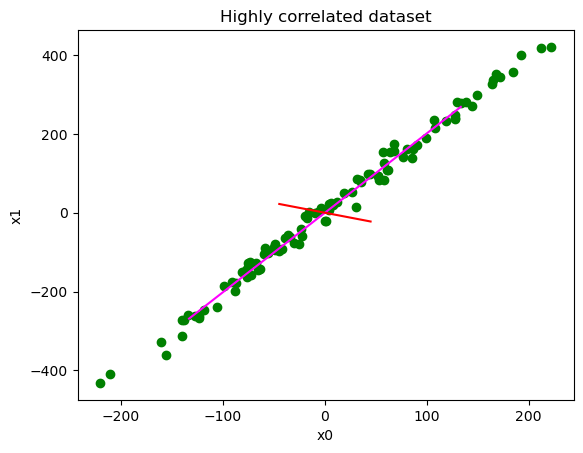

In [19]:
plt.figure()

# Plot x0 and x1 along X and Y axes respectively.
# Since they are correlated, the points will *not*
# be spread uniformly in the X-Y plane.
# Rather they will be clustered around the curve
# capturing the relationship between x0 and x1
# (in this case the straight line y = 2x)
plt.scatter(X[:, 0], X[:, 1], color="green")
plt.title('Highly correlated dataset')
plt.xlabel('x0')
plt.ylabel('x1')

# Assert that the principal components are orthogonal
assert torch.allclose(torch.matmul(principal_components.T, principal_components), torch.eye(X.shape[1]))

# Find the index with highest principal value
major_index = np.argmax(principal_values)
minor_index = np.argmin(principal_values)

# Plot the first principal component. It should
# be along the principal spread, showing us the
# major pattern (correlation) in the data.
draw_line(principal_components[:, major_index].numpy(),
          min_x=-300, max_x=300)
draw_line(principal_components[:, minor_index].numpy(),
          min_x=-50, max_x=50, color="red")

In [20]:
first_princpal_vec = principal_components[:,
                                          major_index]
first_princpal_vec = first_princpal_vec.reshape((-1, 1))
print("First Principal Vector is:\n{}\n"
      "Note: It is a column vector, numpy represents\n"
      "it as a vector of vectors\n".
      format(first_princpal_vec))

First Principal Vector is:
tensor([[-0.4445],
        [-0.8958]])
Note: It is a column vector, numpy represents
it as a vector of vectors



New data set shape: torch.Size([100, 1]) 


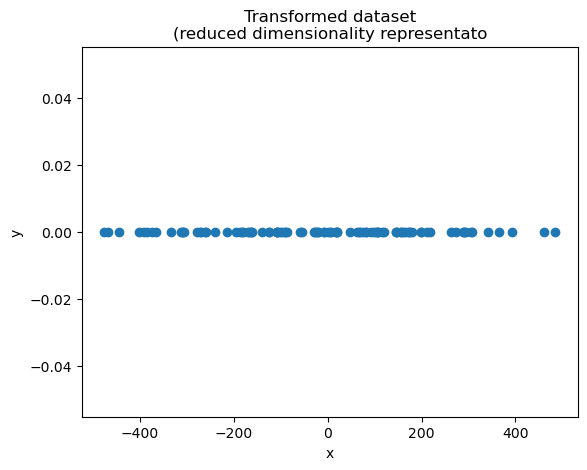

In [21]:
X_proj = torch.matmul(X, first_princpal_vec)
print("New data set shape: {} ".format(X_proj.shape))

# Let us plot the projected data
plt.figure(1)
plt.title('Transformed dataset\n'
          '(reduced dimensionality representato')
plt.scatter(X_proj[:, 0],
            np.zeros_like(X_proj[:, 0]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0, 0.5, 'y')

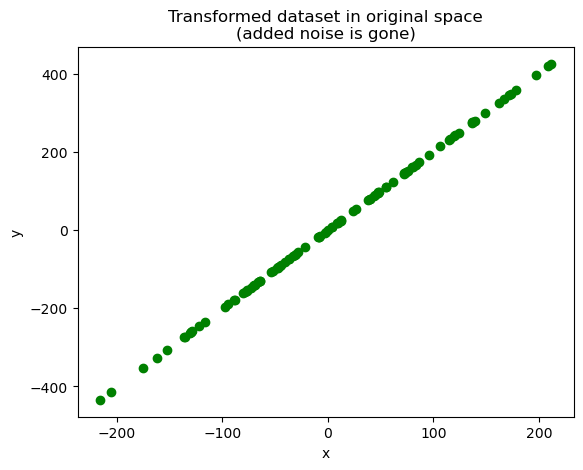

In [22]:
#We use np.linalg.pinv to compute pseudo inverse
X_back_proj = torch.matmul(X_proj,
                torch.linalg.pinv(first_princpal_vec))

plt.figure(2)
plt.title('Transformed dataset in original space\n'
          '(added noise is gone)')
plt.scatter(X_back_proj[:, 0], X_back_proj[:, 1],
            color="green")
plt.xlabel('x')
plt.ylabel('y')

In [23]:
# Information lost due to dimensionality reduction.
# (here we've lost only noise)
info_loss = torch.sqrt(torch.mean((X_back_proj - X)**2))
print("Loss in Information due to\ndimensionality reduction: {}".format(info_loss))

Loss in Information due to
dimensionality reduction: 5.570886135101318


# non linear example

Text(0, 0.5, 'x1')

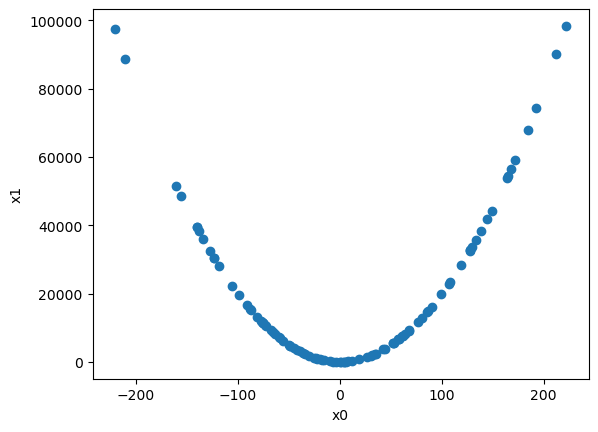

In [27]:
N = 100

torch.manual_seed(42)

x_0 = torch.normal(0, 100, (N,))
x_1 = 2 * (x_0 ** 2) + torch.normal(0, 5, (N,))
X = torch.column_stack((x_0, x_1))

plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('x0')
plt.ylabel('x1')

In [25]:
principal_values, principal_components = pca(X)

principal_values = principal_values.real
principal_components = principal_components.real

print("Principal values are {}".format(principal_values))


Principal values are tensor([9.3440e+03, 5.3373e+08])


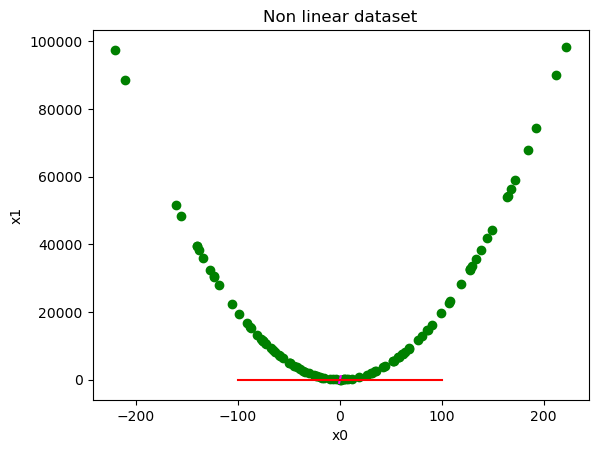

In [30]:
major_index = torch.argmax(principal_values)
minor_index = torch.argmin(principal_values)

plt.scatter(X[:, 0], X[: , 1], color="green")
plt.title('Non linear dataset')
plt.xlabel('x0')
plt.ylabel('x1')

draw_line(principal_components[:, major_index].numpy(),
          min_x=-1000, max_x=1000)
draw_line(principal_components[:, minor_index].numpy(),
          min_x=-100, max_x=100, color="red")

In [31]:
first_princpal_vec = principal_components[:, major_index]
first_princpal_vec = first_princpal_vec.reshape((-1, 1))
X_proj = torch.matmul(X, first_princpal_vec)
X_back_proj = torch.matmul(X_proj, torch.linalg.pinv(first_princpal_vec))
info_loss = torch.sqrt(torch.mean((X_back_proj - X)**2))
print("Mean loss in information: {}\n - high".format(info_loss))

Mean loss in information: 68.48326873779297
 - high
